# K-NN sample problem

### *Objective*

* **The introduction of the K-NN Algorithm** : We are going to study the concept of K-NN(K Nearest Neighbors) which is a simple but important algorithm in Machine Learning.
* **How to implement K-NN with Numpy** : We will implement K-NN with Numpy.
* **How to implement K-NN with Scikit-Learn** : We will implement K-NN with Scikit-Learn.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## [ 1. K-NN Algorithm Introduction ]

K-NN is an algorithm to classify new data through a majority vote of the number K of nearest data which are already classified.

We will briefly understand K-NN through an example.

### Sample Data )  
<img src = "https://imgur.com/S8Fwbtj.png">

In [2]:
# Load the Numpy Package
import numpy as np

Make a numpy array with sample data

In [3]:
# Generate data as a shape like [weight, price]
dataset = np.array([
    [73, 178],
    [45, 160],
    [55, 155],
    [75, 180],
    [75, 175],
    [65, 170],
    [90, 190]    
])

# Make labels(HSCODE) for each data
labels = np.array(['H1', 
                   'H2', 
                   'H2', 
                   'H1', 
                   'H1', 
                   'H2', 
                   'H1'])

# Generate new unlabelled data that must be classfied.
newX = np.array([67, 173])

In [4]:
# Get indexs of matching data to each label
H1_index = np.where(labels == 'H1')
H2_index = np.where(labels == 'H2')

Visualize created data

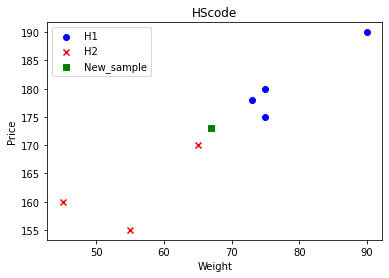

<Figure size 720x576 with 0 Axes>

In [5]:
# Set the title of the graph
plt.title("HScode")

# Visualize data, which is labeled as 'H1', as a shape of blue dot.
plt.scatter(dataset[H1_index,0],dataset[H1_index,1],label='H1',
            c='b', marker='o')

# Visualize data, which is labeled as 'H2', as a shape of red x.
plt.scatter(dataset[H2_index,0],dataset[H2_index,1],label='H2',
            c='r', marker='x')

# Visualize new data, as a shape of green square.
plt.scatter(newX[0],newX[1],label="New_sample",
            c='g', marker='s')

# Set labels of axis x and y in the graph.
plt.xlabel('Weight')
plt.ylabel('Price')

# Show data labels in the graph.
plt.legend()

# After setting the size, print the graph.
plt.figure(figsize=(10,8))
plt.show()

**Which category will the green square belong to?**

Probably we can guess that it will be 'H2' if we just see the graph.<br/>
However, if we predict in a quantitative way, we can **get the number K data that are nearest to new data**, and we can decide its group by **checking which data label shows the largest frequency**.

We call this classification way as **K-NN(K Nearest Neighbors)**

## [ 2. How to implement K-NN with Numpy ]

This is a progressing order of the K-NN algorithm.

1. Calculate distances between the new unlabeled data(newX) and other existing data.
2. Sort distances in ascending power
3. Get the number K of nearest data from new data(newX)
4. Find the label which has the highest frequency.
5. return that label.

We will write code by following this order.

## 1. Numpy Code Writing - Step by step

### (1) Calculate distances between the new unlabeled data(newX) and other existing data.

We should measure all distances between the new point(newX) and other points(dataset) in advance.

This is a Euclidean distance expression that we are going to use. 
$$
\mbox{if }point1 = (x_1,y_1),  point2 = (x_2,y_2)\mbox{  are given,}\\
distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [6]:
dists = []
for point2 in dataset:
    distance = np.sqrt(np.sum((newX-point2)**2)) # Distance between point1 and point2
    dists.append(distance)
    
dists = np.array(dists)
dists

array([ 7.81024968, 25.55386468, 21.63330765, 10.63014581,  8.24621125,
        3.60555128, 28.60069929])

Resulted values above here mean distances from new data to other data.

In [7]:
# We can use broadcasting to simplify code and make the program faster.
dists = np.sqrt(np.sum((newX-dataset)**2, axis=1))
dists

array([ 7.81024968, 25.55386468, 21.63330765, 10.63014581,  8.24621125,
        3.60555128, 28.60069929])

### (2) Sort distances in ascending power

In [8]:
# Get indexs of sorted distance data in ascending power
sorted_index = dists.argsort()
sorted_index

array([5, 0, 4, 3, 2, 1, 6], dtype=int64)

### (3) Get the number K of nearest data from new data(newX)

In this example, we will set 'K' as 4.
Which means, we will extract 4 nearest data from new data(newX).

In [9]:
# Get labels from sorted indexes.
sorted_labels = labels[sorted_index]

# extract 4 labels.
K_nearest_labels = sorted_labels[:4]

In [10]:
K_nearest_labels

array(['H2', 'H1', 'H1', 'H1'], dtype='<U2')

### (4) Find the label which has the highest frequency.

In [11]:
# Count the frequency of each label
count_dict = {}
for label in K_nearest_labels:
    if label in count_dict:
        count_dict[label] += 1
    else:
        count_dict[label] = 1

count_dict

{'H2': 1, 'H1': 3}

In [12]:
# Get the label that has the maximum count
max_count = 0
top_label = ""
for key, value in count_dict.items():
    if value > max_count:
        top_label = key
        max_count = value
top_label

'H1'

We can also make the codes above simple by using Numpy methods.

In [13]:
_labels, count_labels = np.unique(K_nearest_labels,
          return_counts=True)
_labels, count_labels

(array(['H1', 'H2'], dtype='<U2'), array([3, 1], dtype=int64))

In [14]:
_labels[count_labels.argmax()]

'H1'

## 2. Numpy Code Writing - All-in-one

In this part, we are going to merge every step into one code for the K-NN algorithm. 

In [15]:
def classify_knn(inX, dataset, labels, K):
    # (1) Calculate distances between the new unlabeled data(newX) and other existing data.
    dists = np.sqrt(np.sum((inX-dataset)**2, axis=1))
    
    # (2) Sort distances in ascending power
    sorted_index = dists.argsort()
    
    # (3) Get the number K of nearest data from new data(newX)
    sorted_labels = labels[sorted_index]
    K_nearest_labels = sorted_labels[:K]
    
    # (4) Find the label which has the highest frequency.
    _labels, count_labels = np.unique(K_nearest_labels,
          return_counts=True)
    
    # (5) return that label.
    return _labels[count_labels.argmax()]

Now, we can classify the label of new data through the K-NN algorithm which we've made.

In [16]:
# Classifying stuff with 67kg of weight and 173 of price, the case when K is 1
classify_knn([newX[0], newX[1]], dataset, labels, 1)

'H2'

In [17]:
# Classifying stuff with 67kg of weight and 173 of price, the case when K is 4
classify_knn([newX[0], newX[1]], dataset, labels, 4)

'H1'

In [18]:
# Classifying stuff with 60kg of weight and 165 of price, the case if K is 4
classify_knn([60, 165], dataset, labels, 4)

'H2'

This time, we will visualize the graph after classification.

In [19]:
# Set the new label for new data. K is 4 in this example.
new_labels = np.append(labels, classify_knn([newX[0], newX[1]], dataset, labels, 4))

# Change the shape of new data to input to the dataset
labeled_newX = np.reshape(newX, (-1, 2))

# Concatenate new data and the dataset
new_dataset = np.concatenate([dataset, labeled_newX], axis=0)

# Get indexs of data per label.
new_H1_index = np.where(new_labels == 'H1')
new_H2_index = np.where(new_labels == 'H2')

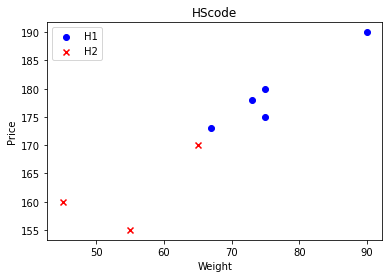

<Figure size 720x576 with 0 Axes>

In [20]:
# Set the title of the graph
plt.title("HScode")

# Visualize data, which is labeled as 'H1', as a shape of blue dot.
plt.scatter(new_dataset[new_H1_index,0],new_dataset[new_H1_index,1],label='H1',
            c='b', marker='o')

# Visualize data, which is labeled as 'H2', as a shape of red x.
plt.scatter(new_dataset[new_H2_index,0],new_dataset[new_H2_index,1],label='H2',
            c='r', marker='x')

# Set labels of axis x and y in the graph.
plt.xlabel('Weight')
plt.ylabel('Price')

# Show data labels in the graph.
plt.legend()

# After setting the size, print the graph.
plt.figure(figsize=(10,8))
plt.show()

By the K-NN algorithm which we've implemented with Numpy, we can see new data is classified as 'H1' if K is 4.

## [ 3. How to implement K-NN with Scikit-Learn ]

We can also easily implement the K-NN algorithm by using the KNeighborsClassifier class from Scikit-Learn.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

When we make a KNeighborsClassifier instance, we must send K to the n_neighbors parameter.

After the instance is generated, the instance can be trained with its fit method and the K-NN algorithm will be implemented.

In [22]:
# Generate the K-NN implementing instance that K is 4
knn = KNeighborsClassifier(n_neighbors=4)

# Train the instance with dataset and labels
knn.fit(dataset, labels)

KNeighborsClassifier(n_neighbors=4)

We can figure out which category new data will belong to by passing uncategorized data to the predict instance method when K is 4.

In [23]:
knn.predict([newX])  # The dimension of argument must be 2

array(['H1'], dtype='<U2')

In [24]:
knn.predict([[60, 165]])  # The dimension of argument must be 2

array(['H2'], dtype='<U2')

Again, We will Visualize the entire data after classifying new data 

In [25]:
# Set the new label for new data. K is 4 in this example.
sk_labels = np.append(labels, knn.predict([newX]))

# Change the shape of new data to input to the dataset
sk_newX = np.reshape(newX, (-1, 2))

# Concatenate new data and the dataset
sk_dataset = np.concatenate([dataset, sk_newX], axis=0)

# Get indexs of data per label.
sk_H1_index = np.where(sk_labels == 'H1')
sk_H2_index = np.where(sk_labels == 'H2')

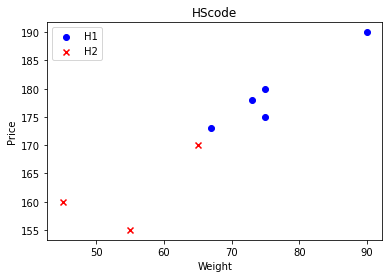

<Figure size 720x576 with 0 Axes>

In [26]:
# Set the title of the graph
plt.title("HScode")

# Visualize data, which is labeled as 'H1', as a shape of blue dot.
plt.scatter(sk_dataset[sk_H1_index,0],sk_dataset[sk_H1_index,1],label='H1',
            c='b', marker='o')

# Visualize data, which is labeled as 'H2', as a shape of red x.
plt.scatter(sk_dataset[sk_H2_index,0],sk_dataset[sk_H2_index,1],label='H2',
            c='r', marker='x')

# Set labels of axis x and y in the graph.
plt.xlabel('Weight')
plt.ylabel('Price')

# Show data labels in the graph.
plt.legend()

# After setting the size, print the graph.
plt.figure(figsize=(10,8))
plt.show()

As a result, we can see new data is successfully classified by the K-NN algorithm that is implemented with Scikit-Learn.